<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

##### What we plan to do

There are are many variables that determine how much a home can fetch.
Using the Ames (IA) housing data ( from 2006 to 2010 ), we want to find out which variables matter for home sale prices and produce accurate sale price predictions. 

##### What models will we be exploring

We will be focusing our project on supervised machine learning models, in particular, linear models and regularization.

##### How will success be evaluated?

The success of our models will be determined by the highest R2 and lowest RMSE scores. This will represent the accuracy and the margin or error of our models. Using these scores, we aim to create a model that will outperform the baseline model that we have identified.

##### Is the scope of the project appropriate? Who are our important stakeholders and why is this important to investigate?

This model will provide the Outside View, helping to reduce information asymmetry between potential home buyers, sellers and real estate agents.<br><br>
An Inside View involves making a prediction based on knowledge that the predictor already has, (eg insider news for stocks and shares), while an Outside View prediction ignores these details and makes an estimation based on a class of rougly similar previous cases. This is to cut out any bias that may exist.

### Contents

* Background
* Data sets used
* Data Import
* Cleaning Train Dataset
* Exploratory Data Analysis
* Train and Test Model
* Conclusion


### Background 

The original original intent for the data was to be used for tax assessment purposes but lends itself directly to the prediction of home selling prices. The type of information contained in the data is similar to what a typical home buyer would want to know before making a purchase, like size, neighborhood, exterior, basement, sale price, etc.

### Data sets used 

* train.csv
* test.csv

### Data Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.utils import resample
from scipy import stats

In [3]:
train_df = pd.read_csv('./datasets/train.csv')
test_df = pd.read_csv('./datasets/test.csv')

# backup df
old_train_df = train_df
old_test_df = test_df

In [4]:
print(train_df.shape)
print(test_df.shape)

(2051, 81)
(878, 80)


### Cleaning Train Dataset

In [5]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

###### Rename Columns

In [8]:
train_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
# edit column names -> lower case -> replace space with _

train_df.columns= train_df.columns.str.lower()
train_df.columns = train_df.columns.str.replace(' ','_')

test_df.columns = test_df.columns.str.lower()
test_df.columns = test_df.columns.str.replace(' ','_')

In [10]:
# convert year to age train_df

train_df['house_age'] = train_df['yr_sold'] - train_df['year_built']
train_df['reno_age'] = train_df['yr_sold'] - train_df['year_remod/add']
train_df['garage_age'] = train_df['yr_sold'] - train_df['garage_yr_blt']

train_df.drop(columns=['year_built', 'year_remod/add', 'garage_yr_blt'],inplace = True)

In [11]:
#convert year to age test_df

test_df['house_age'] = test_df['yr_sold'] - test_df['year_built']
test_df['reno_age'] = test_df['yr_sold'] - test_df['year_remod/add']
test_df['garage_age'] = test_df['yr_sold'] - test_df['garage_yr_blt']

test_df.drop(columns=['year_built', 'year_remod/add', 'garage_yr_blt'],inplace = True)

### Exploratory Data Analysis

###### Ordinal Features

From data dictionary, we can see that some features are ordinal in nature. Convert these features to ordinal numbers to better represent the scale of the feature.

In [12]:
ordinal_features = ['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual',
           'garage_cond', 'heating_qc']

In [13]:
# convert to ordinal features

# train_df

for x in ordinal_features:
    train_df[x].fillna(0, inplace=True)
    train_df[x].replace('Po', 1, inplace=True)
    train_df[x].replace('Fa', 2, inplace=True)
    train_df[x].replace('TA', 3, inplace=True)
    train_df[x].replace('Gd', 4, inplace=True)
    train_df[x].replace('Ex', 5, inplace=True)
    
# test_df

for x in ordinal_features:
    test_df[x].fillna(0, inplace=True)
    test_df[x].replace('Po', 1, inplace=True)
    test_df[x].replace('Fa', 2, inplace=True)
    test_df[x].replace('TA', 3, inplace=True)
    test_df[x].replace('Gd', 4, inplace=True)
    test_df[x].replace('Ex', 5, inplace=True)

###### Exploring Pearson's Correlation for each feature.

In [14]:
corr = train_df.corr()
corr['saleprice'].sort_values(ascending = False)

saleprice          1.000000
overall_qual       0.800207
exter_qual         0.712146
gr_liv_area        0.697038
kitchen_qual       0.692336
garage_area        0.650270
garage_cars        0.648220
total_bsmt_sf      0.628925
1st_flr_sf         0.618486
bsmt_qual          0.612188
full_bath          0.537969
mas_vnr_area       0.512230
totrms_abvgrd      0.504014
fireplaces         0.471093
heating_qc         0.458354
bsmtfin_sf_1       0.423519
lot_frontage       0.341842
open_porch_sf      0.333476
wood_deck_sf       0.326490
lot_area           0.296566
garage_qual        0.285281
bsmt_full_bath     0.283662
half_bath          0.283001
garage_cond        0.265021
2nd_flr_sf         0.248452
bsmt_cond          0.225075
bsmt_unf_sf        0.190210
bedroom_abvgr      0.137067
screen_porch       0.134581
3ssn_porch         0.048732
exter_cond         0.036418
mo_sold            0.032735
pool_area          0.023106
bsmtfin_sf_2       0.016255
misc_val          -0.007375
yr_sold           -0

There is a large number of features in the dataset, and some features may predict the target variable better than others. Dropping features that do not have a strong positive or negative Pearson's correlation with the target variable to reduce noise.

In [15]:
corr['saleprice'].sort_values(ascending = False).index

Index(['saleprice', 'overall_qual', 'exter_qual', 'gr_liv_area',
       'kitchen_qual', 'garage_area', 'garage_cars', 'total_bsmt_sf',
       '1st_flr_sf', 'bsmt_qual', 'full_bath', 'mas_vnr_area', 'totrms_abvgrd',
       'fireplaces', 'heating_qc', 'bsmtfin_sf_1', 'lot_frontage',
       'open_porch_sf', 'wood_deck_sf', 'lot_area', 'garage_qual',
       'bsmt_full_bath', 'half_bath', 'garage_cond', '2nd_flr_sf', 'bsmt_cond',
       'bsmt_unf_sf', 'bedroom_abvgr', 'screen_porch', '3ssn_porch',
       'exter_cond', 'mo_sold', 'pool_area', 'bsmtfin_sf_2', 'misc_val',
       'yr_sold', 'low_qual_fin_sf', 'bsmt_half_bath', 'id', 'ms_subclass',
       'overall_cond', 'kitchen_abvgr', 'enclosed_porch', 'pid', 'garage_age',
       'reno_age', 'house_age'],
      dtype='object')

In [16]:
# 0.2

train_df.drop(columns = ['bsmt_unf_sf', 'bedroom_abvgr', 'screen_porch', '3ssn_porch',
       'exter_cond', 'mo_sold', 'pool_area', 'bsmtfin_sf_2', 'misc_val',
       'yr_sold', 'low_qual_fin_sf', 'bsmt_half_bath',  'ms_subclass',
       'overall_cond', 'kitchen_abvgr', 'enclosed_porch'], inplace = True)

In [17]:
train_df.shape

(2051, 65)

###### Checking for Multicollinearity 

Due to the large amount of features in the dataset, it is likely that a few features may be correlated to each other. Checking dataset for such features.

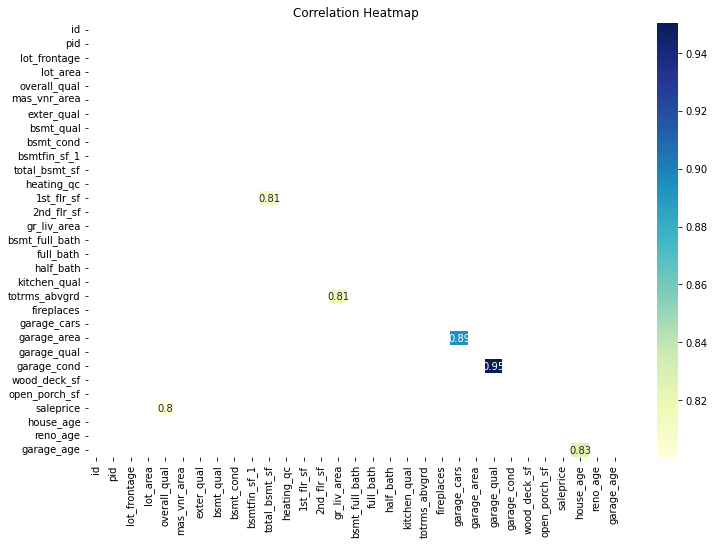

In [18]:
mask = np.zeros_like(train_df.corr()[abs(train_df.corr()) >= 0.8])
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize= (12,8))
sns.heatmap(train_df.corr()[abs(train_df.corr()) >= 0.8], annot= True, cmap = "YlGnBu", mask = mask)
title = plt.title('Correlation Heatmap')
plt.show()

There are some features that show a strong correlation with each other.
- 1st_flr_sf with total_bsmt_sf
- gr_living_area with totrms_abvgrd
- garage_cars with garage_area
- garage_cond with garage_qual
- garage_age with house_age<br>

Dropping features with lower pearson's correlation with saleprice.

In [19]:
# total_bsmt_sf      0.628925
# 1st_flr_sf         0.618486 drop

# gr_liv_area        0.697038
# totrms_abvgrd      0.504014 drop

# garage_area        0.650270
# garage_cars        0.648220 drop

# garage_qual        0.285281
# garage_cond        0.265021 drop

# garage_age        -0.533962 drop
# house_age         -0.571881

train_df.drop(columns = ['1st_flr_sf', 
                         'totrms_abvgrd', 
                         'garage_cars', 
                         'garage_cond', 
                         'garage_age'], 
              inplace = True)

test_df.drop(columns = ['1st_flr_sf', 
                         'totrms_abvgrd', 
                         'garage_cars', 
                         'garage_cond', 
                         'garage_age'], 
              inplace = True)

###### Impute Numerical NaN values for Train dataset numerical features

In [20]:
pd.set_option("display.max_rows", 101)
train_nan = train_df.isnull().sum().sort_values(ascending = False)
train_nan

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_full_bath       2
total_bsmt_sf        1
bsmtfin_sf_1         1
garage_area          1
heating_qc           0
house_age            0
saleprice            0
electrical           0
sale_type            0
open_porch_sf        0
2nd_flr_sf           0
gr_liv_area          0
wood_deck_sf         0
full_bath            0
paved_drive          0
garage_qual          0
half_bath            0
kitchen_qual         0
functional           0
fireplaces           0
central_air          0
id                   0
heating              0
condition_2          0
ms_zoning            0
lot_area             0
street               0
lot_shape            0
land_contour         0
utilities            0
lot_config 

In [21]:
train_to_remove_col = []
train_to_remove_val = []
for col, val in train_nan.iteritems():
    if val > 0:
        train_to_remove_col.append(col)
        train_to_remove_val.append(val)
        

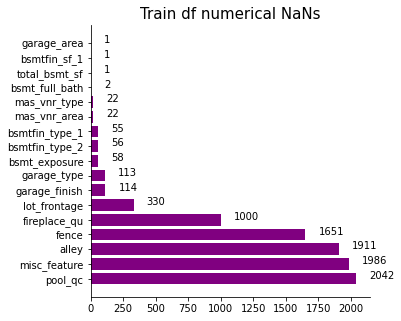

In [22]:
y = train_to_remove_col
width = train_to_remove_val

fig, ax = plt.subplots(figsize=(5,5))

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

plt.barh(y, width,color='purple')
plt.title("Train df numerical NaNs", fontdict = {'fontsize' : 15})
for index, value in enumerate(width):
    plt.text(value + 100, index,
             str(value))
  
plt.show()

In [23]:
test_nan = test_df.isnull().sum().sort_values(ascending = False)
test_nan

pool_qc            874
misc_feature       837
alley              820
fence              706
fireplace_qu       422
lot_frontage       160
garage_finish       45
garage_type         44
bsmtfin_type_2      25
bsmt_exposure       25
bsmtfin_type_1      25
mas_vnr_area         1
electrical           1
mas_vnr_type         1
functional           0
kitchen_abvgr        0
kitchen_qual         0
id                   0
bedroom_abvgr        0
fireplaces           0
full_bath            0
bsmt_half_bath       0
bsmt_full_bath       0
gr_liv_area          0
low_qual_fin_sf      0
half_bath            0
garage_area          0
garage_qual          0
paved_drive          0
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
sale_type            0
house_age            0
2nd_flr_sf           0
total_bsmt_sf        0
central_air          0
overall_qua

In [24]:
test_to_remove_col = []
test_to_remove_val = []
for col, val in test_nan.iteritems():
    if val > 0:
        test_to_remove_col.append(col)
        test_to_remove_val.append(val)

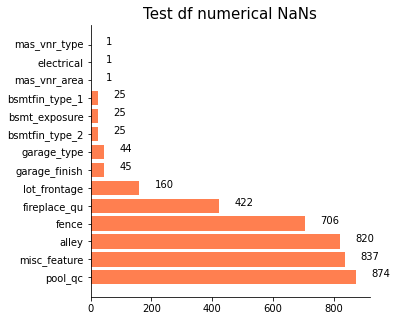

In [25]:
y = test_to_remove_col
width = test_to_remove_val

fig, ax = plt.subplots(figsize=(5,5))

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

plt.barh(y, width,color='coral')
plt.title("Test df numerical NaNs", fontdict = {'fontsize' : 15})
for index, value in enumerate(width):
    plt.text(value + 50, index,
             str(value))
  
plt.show()

Features pool_qc, misc_feature, alley, fence and fireplace_qu have more than 50% of missing data for both train and test dataset. Dropping these columns as they will not provide any useful information for our model.

In [26]:
# dropping columns with large missing data

train_df.drop(columns = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu'], inplace = True)
test_df.drop(columns = ['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu'], inplace = True)

In [27]:
train_df_num = train_df.select_dtypes(include=np.number).columns.tolist()

In [28]:
train_df_num

['id',
 'pid',
 'lot_frontage',
 'lot_area',
 'overall_qual',
 'mas_vnr_area',
 'exter_qual',
 'bsmt_qual',
 'bsmt_cond',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 'heating_qc',
 '2nd_flr_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'full_bath',
 'half_bath',
 'kitchen_qual',
 'fireplaces',
 'garage_area',
 'garage_qual',
 'wood_deck_sf',
 'open_porch_sf',
 'saleprice',
 'house_age',
 'reno_age']

In [29]:
train_df[train_df_num].isnull().sum().sort_values(ascending=False)

lot_frontage      330
mas_vnr_area       22
bsmt_full_bath      2
bsmtfin_sf_1        1
total_bsmt_sf       1
garage_area         1
id                  0
half_bath           0
house_age           0
saleprice           0
open_porch_sf       0
wood_deck_sf        0
garage_qual         0
fireplaces          0
kitchen_qual        0
gr_liv_area         0
full_bath           0
pid                 0
2nd_flr_sf          0
heating_qc          0
bsmt_cond           0
bsmt_qual           0
exter_qual          0
overall_qual        0
lot_area            0
reno_age            0
dtype: int64

Lot Frontage


Lot Frontage NaN % is relatively high and it seems to be missing completely at random. <br>

According to this [website](https://www.gimme-shelter.com/frontage-50043/), all houses have a lot frontage. It is the width of the lot.<br>

Opt to impute with mean as both values for both data sets are not far off.<br>

In [30]:
print('NaNs: ', train_df['lot_frontage'].isnull().sum())
print('Total: ', train_df.shape[0])
print('Percentage: ', (train_df['lot_frontage'].isnull().sum()/train_df.shape[0])*100)

NaNs:  330
Total:  2051
Percentage:  16.089712335446123


In [31]:
print(train_df['lot_frontage'].mean())
print(train_df['lot_frontage'].median())

69.05520046484602
68.0


In [32]:
print(test_df['lot_frontage'].mean())
print(test_df['lot_frontage'].median())

69.54596100278552
68.0


In [33]:
# As the median and the mean for lot_frontage is about the same, fill lot_frontage nan with lot_frontage mean

train_df['lot_frontage'].fillna(train_df['lot_frontage'].mean(),inplace=True)

# imputing test_df does not affect kaggle score

test_df['lot_frontage'].fillna(test_df['lot_frontage'].mean(),inplace=True)

Replace remaining numerical feature NaNs with 0, as they are only a small percentage of the data.

In [34]:
# replace NaN with 0

train_num_list = train_df.select_dtypes(exclude='object').columns.tolist()

for feature in train_num_list:
    train_df[feature].fillna(0, inplace = True)

In [35]:
train_df[train_num_list].isnull().sum().sort_values(ascending=False)

id                0
pid               0
house_age         0
saleprice         0
open_porch_sf     0
wood_deck_sf      0
garage_qual       0
garage_area       0
fireplaces        0
kitchen_qual      0
half_bath         0
full_bath         0
bsmt_full_bath    0
gr_liv_area       0
2nd_flr_sf        0
heating_qc        0
total_bsmt_sf     0
bsmtfin_sf_1      0
bsmt_cond         0
bsmt_qual         0
exter_qual        0
mas_vnr_area      0
overall_qual      0
lot_area          0
lot_frontage      0
reno_age          0
dtype: int64

##### Impute NaN values for train dataset categorical features

In [36]:
train_cat_list = train_df.select_dtypes(include='object').columns.tolist()

train_df[train_cat_list].isnull().sum().sort_values(ascending=False)

garage_finish     114
garage_type       113
bsmt_exposure      58
bsmtfin_type_2     56
bsmtfin_type_1     55
mas_vnr_type       22
ms_zoning           0
exterior_2nd        0
paved_drive         0
functional          0
electrical          0
central_air         0
heating             0
foundation          0
exterior_1st        0
street              0
roof_matl           0
roof_style          0
house_style         0
bldg_type           0
condition_2         0
condition_1         0
neighborhood        0
land_slope          0
lot_config          0
utilities           0
land_contour        0
lot_shape           0
sale_type           0
dtype: int64

For the catagorical features with NaN, they represent that the feature simply does not exist in the home. Replace all NaN with None.

In [37]:
for feature in train_cat_list:
    train_df[feature].fillna('None', inplace = True)

In [38]:
train_df[train_cat_list].isnull().sum().sort_values(ascending=False)

ms_zoning         0
exterior_2nd      0
paved_drive       0
garage_finish     0
garage_type       0
functional        0
electrical        0
central_air       0
heating           0
bsmtfin_type_2    0
bsmtfin_type_1    0
bsmt_exposure     0
foundation        0
mas_vnr_type      0
exterior_1st      0
street            0
roof_matl         0
roof_style        0
house_style       0
bldg_type         0
condition_2       0
condition_1       0
neighborhood      0
land_slope        0
lot_config        0
utilities         0
land_contour      0
lot_shape         0
sale_type         0
dtype: int64

###### Plotting each numerical feature against target variable to check for any irregularities or outliers.

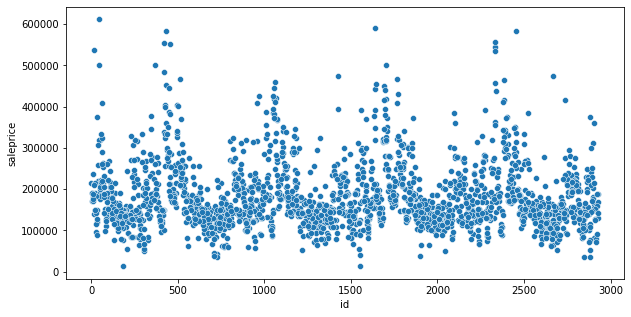

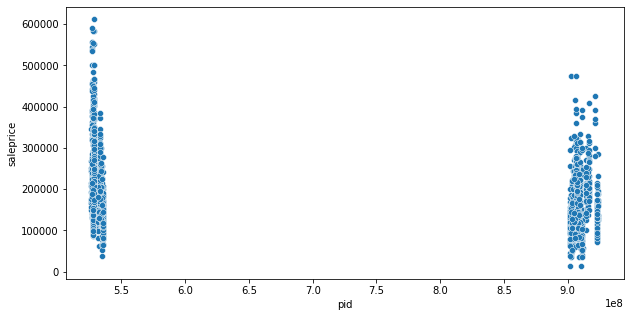

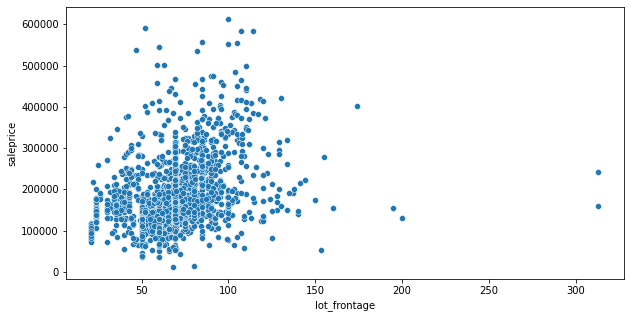

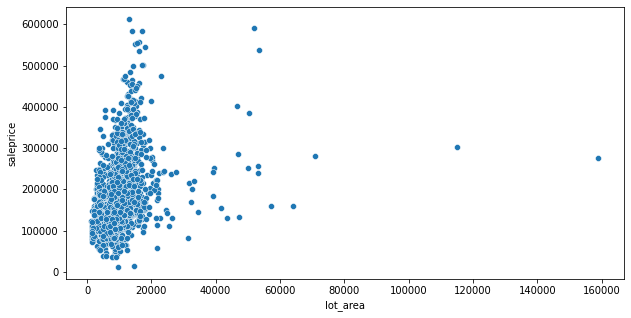

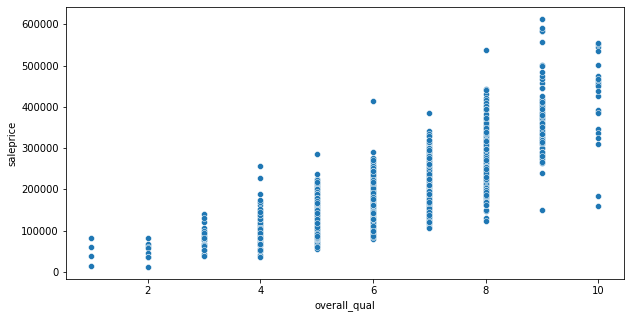

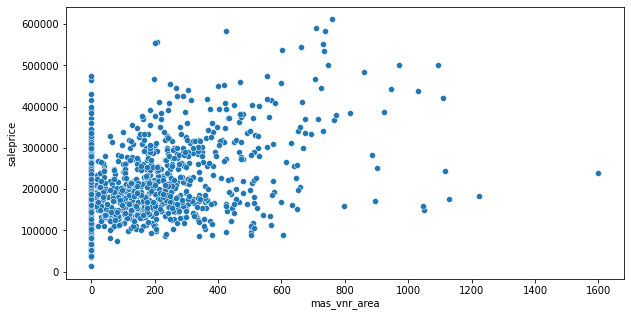

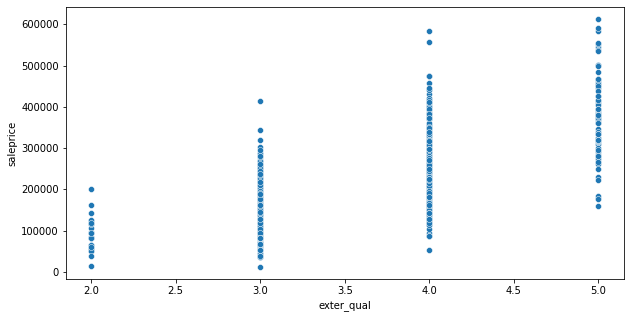

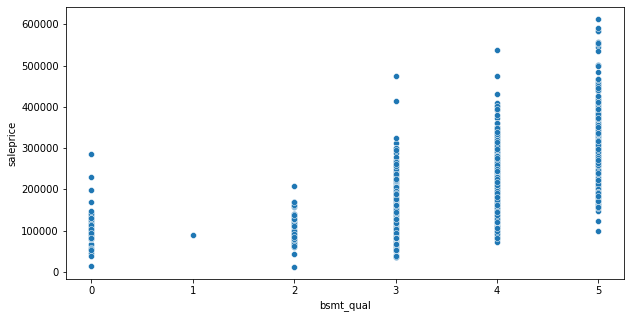

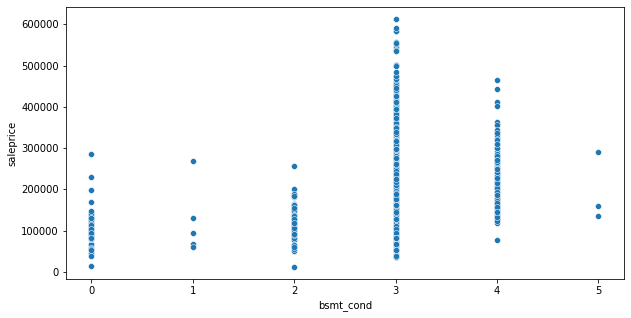

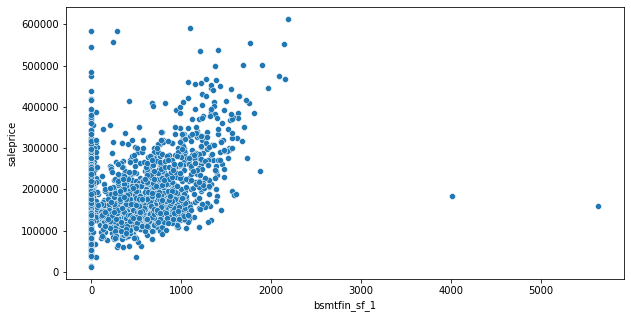

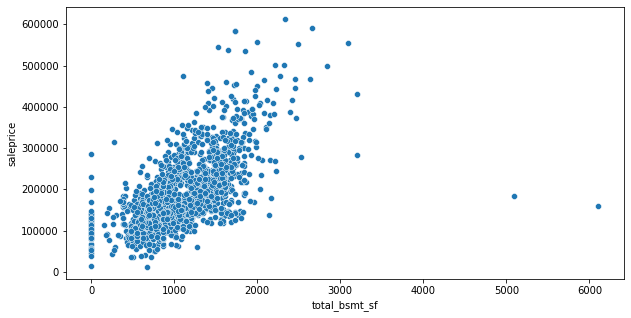

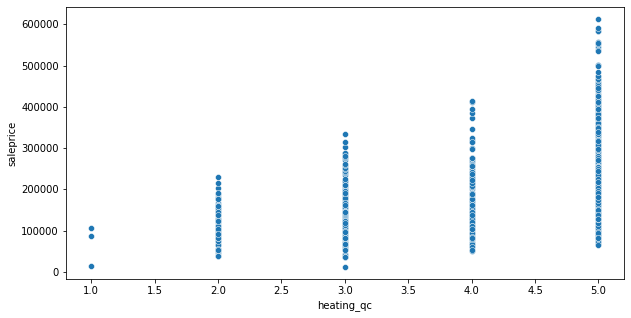

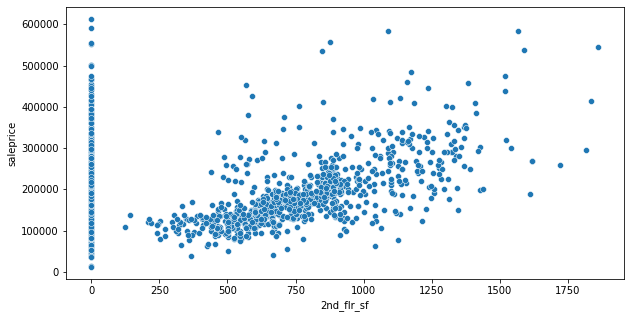

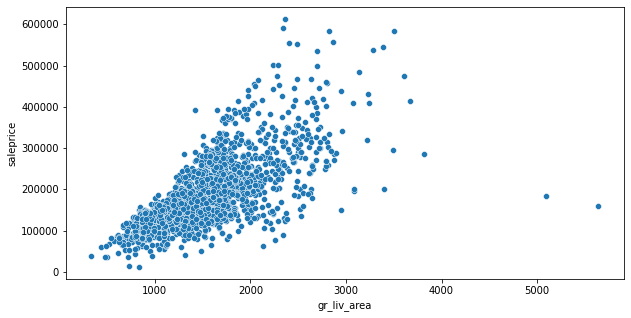

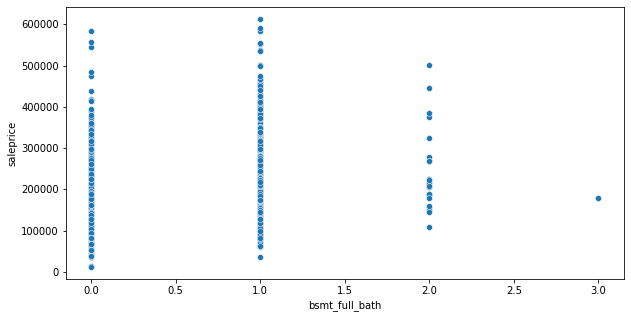

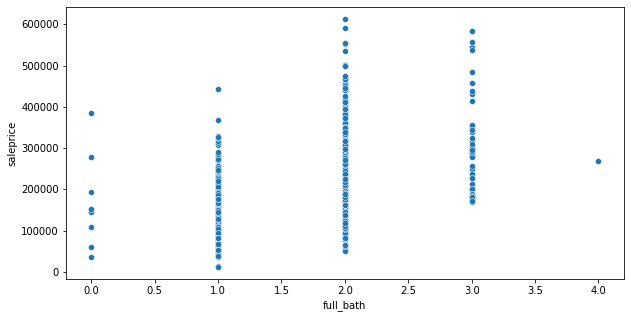

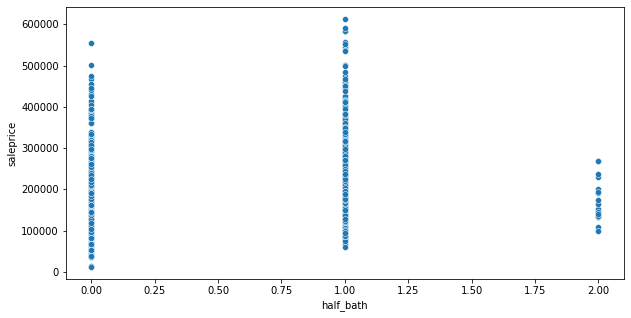

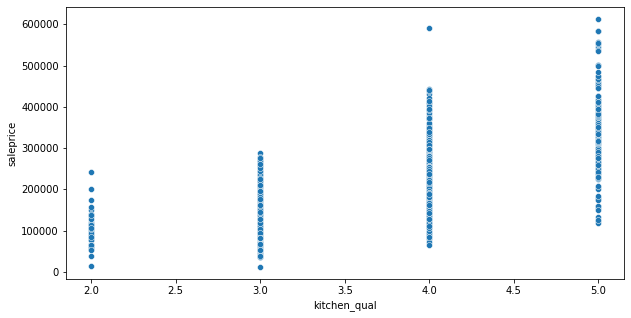

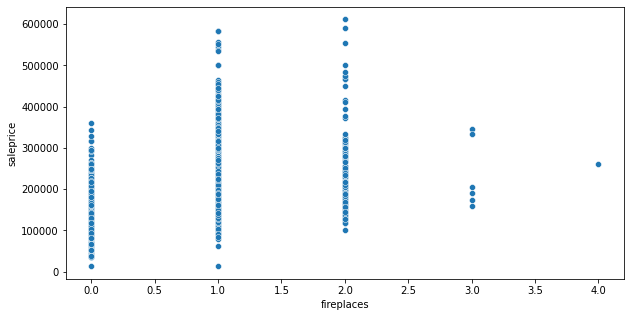

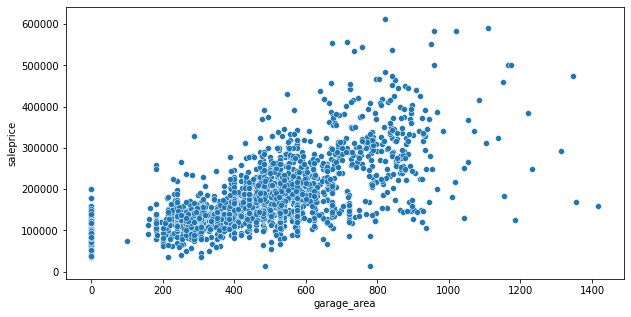

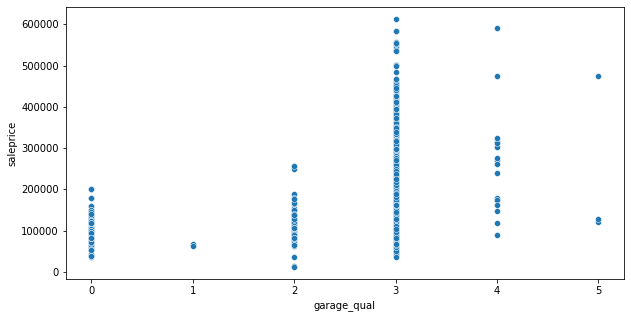

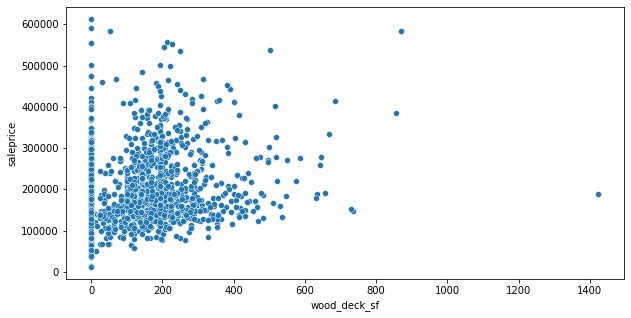

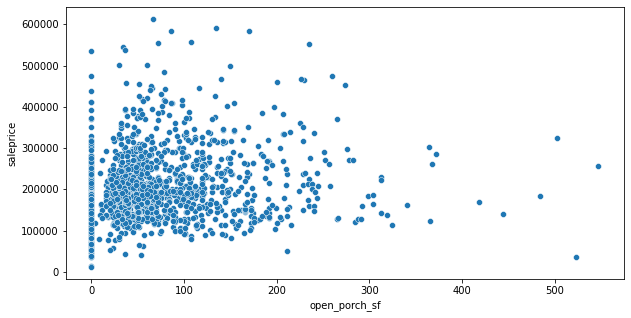

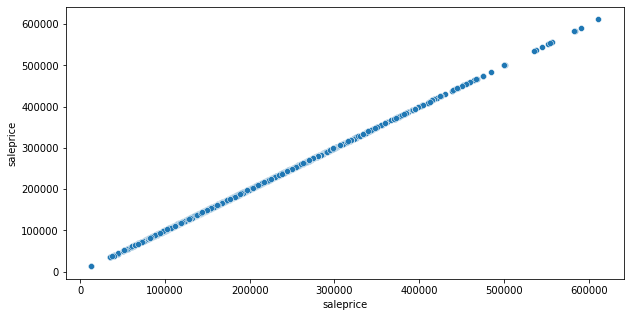

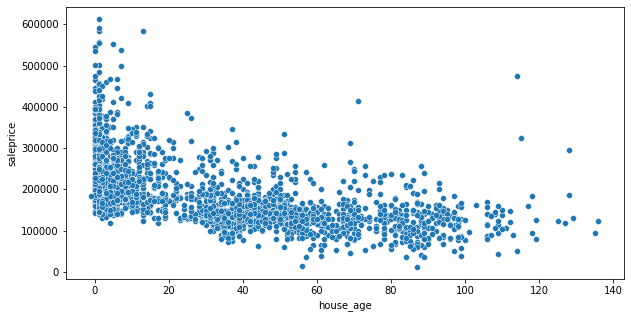

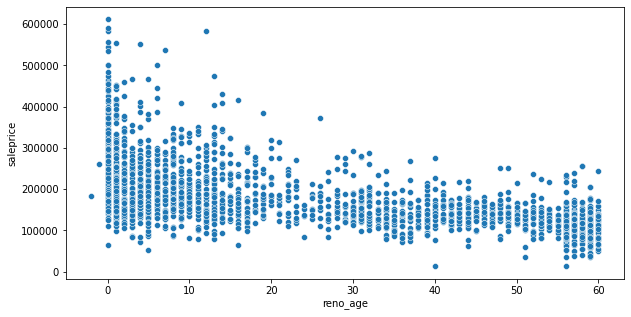

In [39]:
for feature in train_df.select_dtypes(exclude='object').columns.tolist():
    plt.figure(figsize= ( 10, 5 ))
    sns.scatterplot(data=train_df, x=feature, y='saleprice')
    plt.show()

In [40]:
# remove outliers

train_df = train_df[(train_df['lot_frontage'] <=300)]
train_df = train_df[(train_df['mas_vnr_area'] <=1400)]
train_df = train_df[(train_df['bsmtfin_sf_1'] <=3000)]
train_df = train_df[(train_df['total_bsmt_sf'] <=4000)]
train_df = train_df[(train_df['gr_liv_area'] <=4000)]
train_df = train_df[(train_df['wood_deck_sf'] <=1000)]

###### Plotting histograms to see the distribution of each numerical feature.

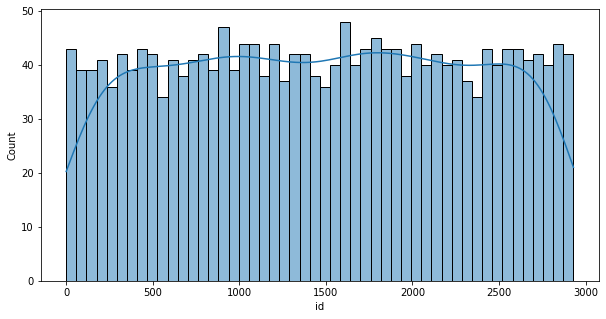

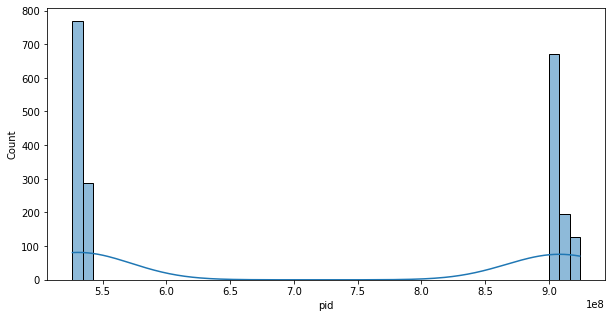

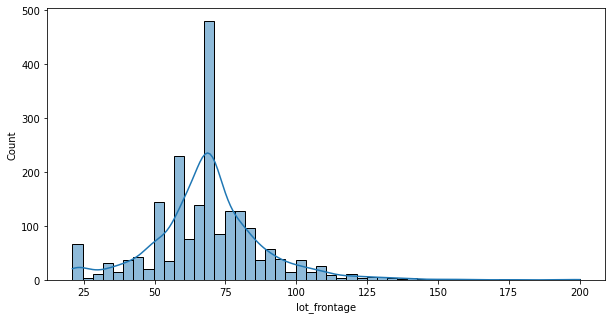

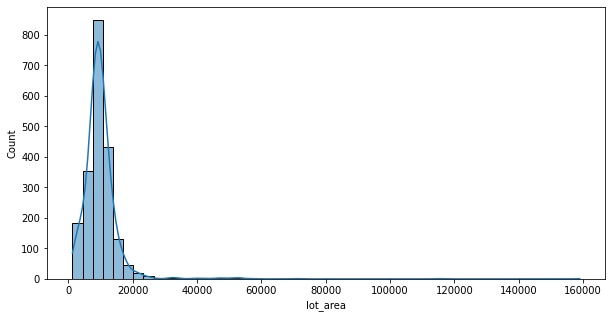

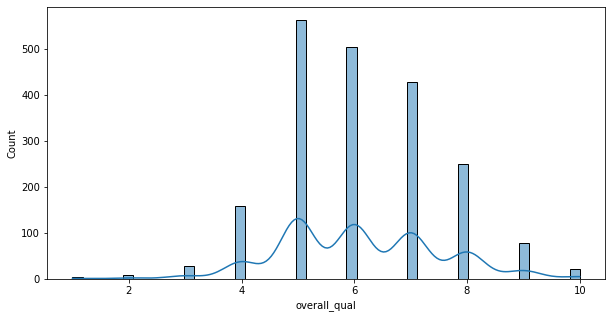

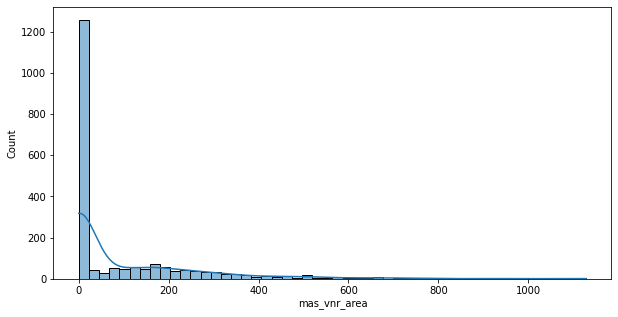

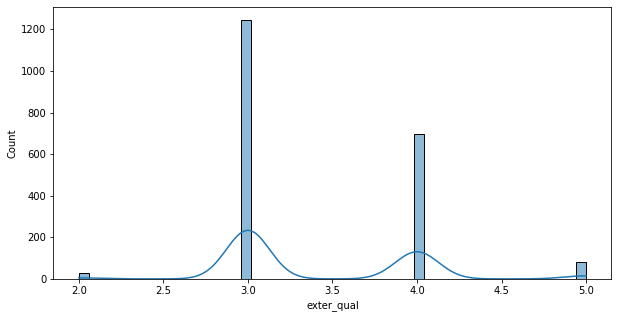

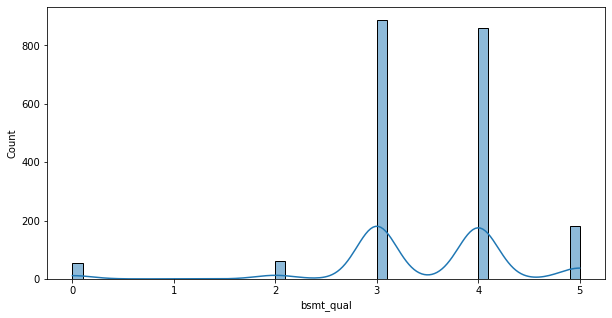

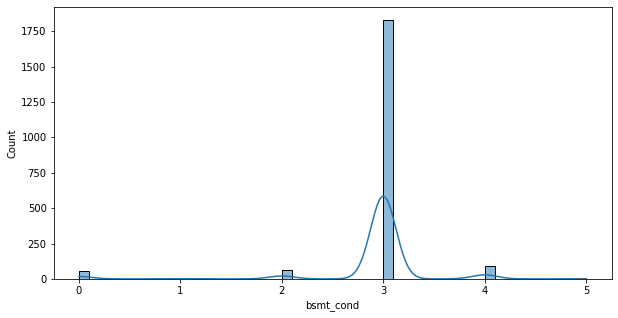

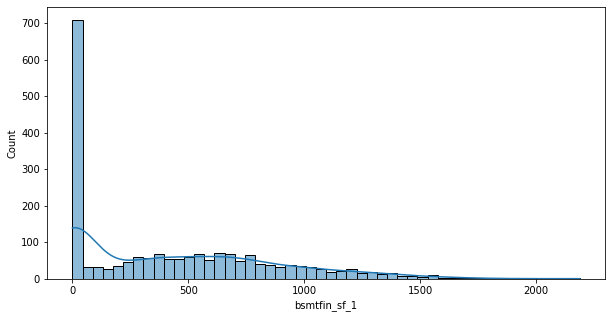

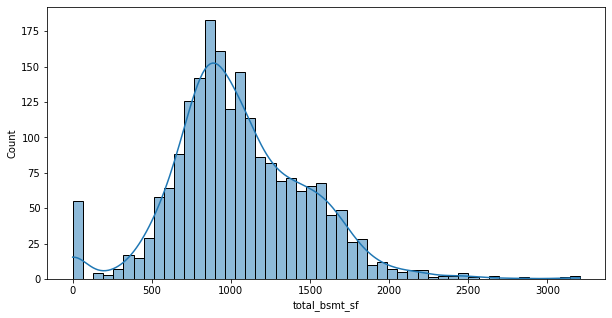

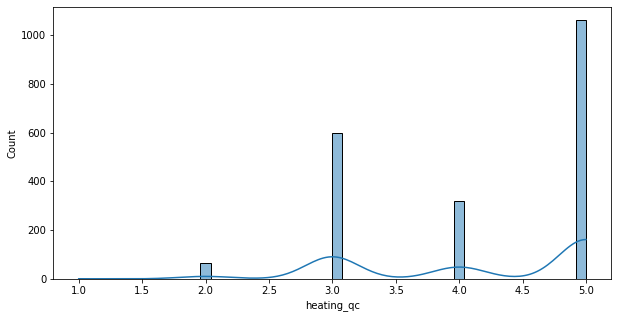

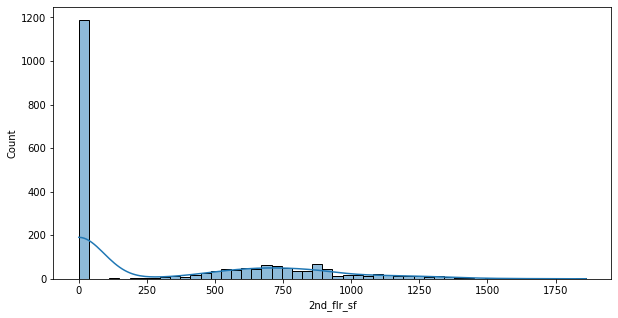

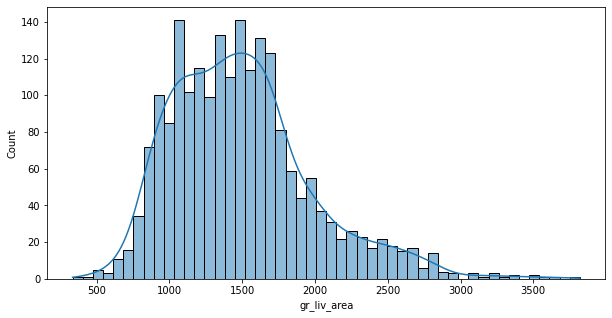

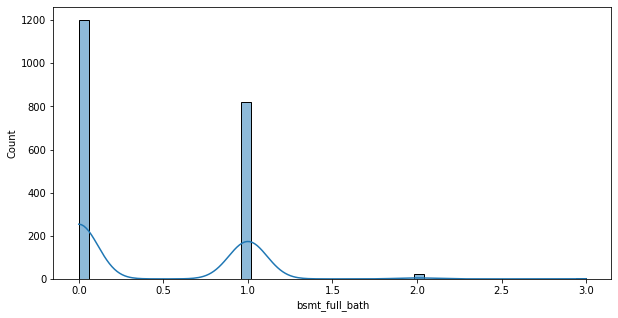

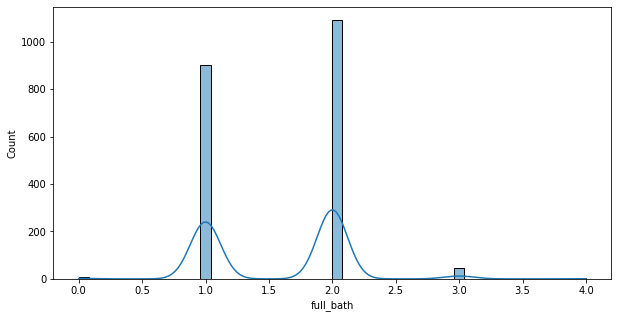

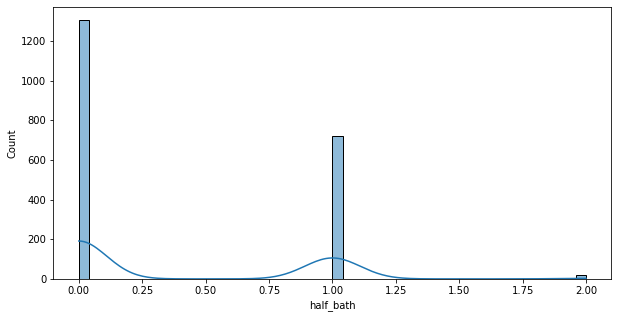

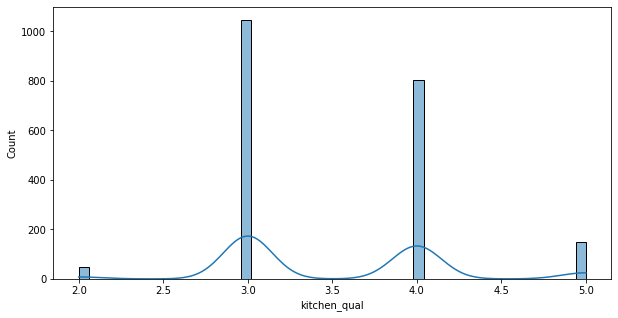

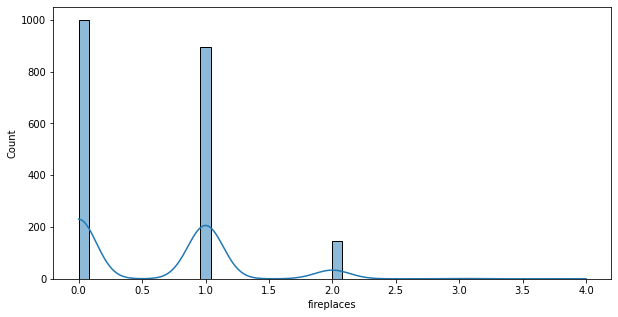

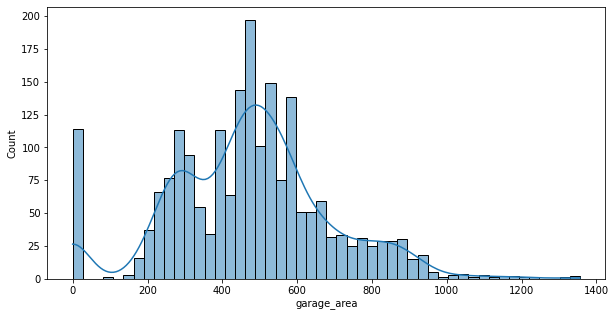

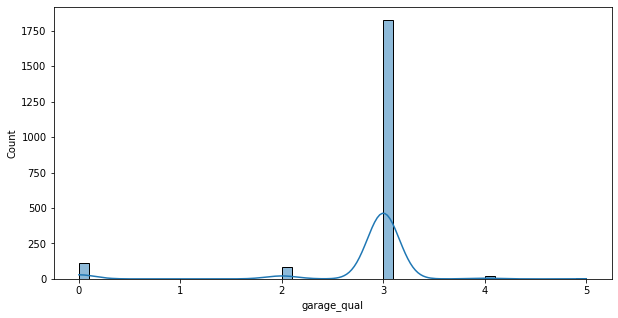

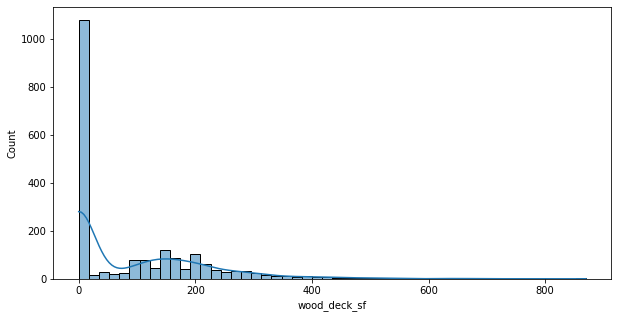

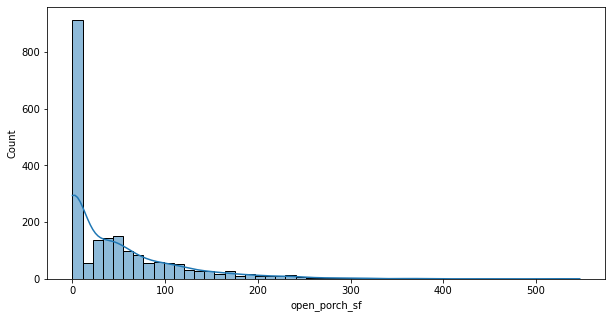

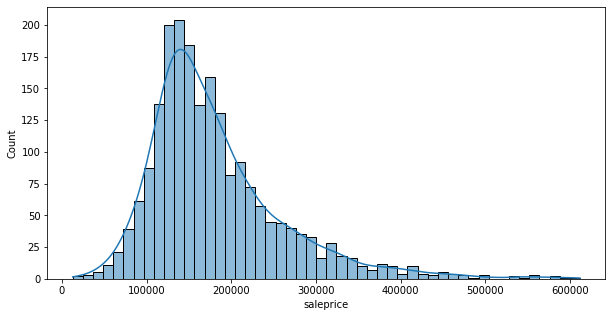

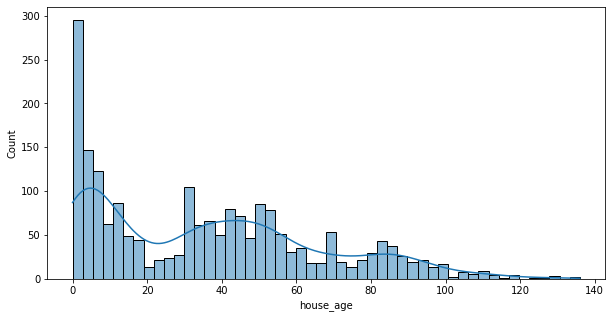

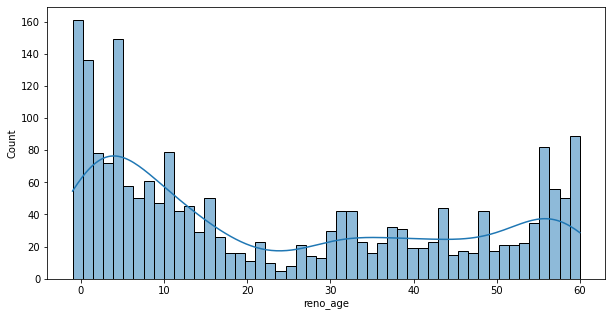

In [41]:
for feature in train_df.select_dtypes(exclude='object').columns.tolist():
    plt.figure(figsize= ( 10, 5 ))
    sns.histplot(data=train_df, x=feature, bins = 50, kde = True)
    plt.show()

Histogram to see if the features are distributed normally. There are some features including our target variable that are right skewed.

###### Plotting box graphs to see if there is any relationships between each catagorical feature with our target variable.

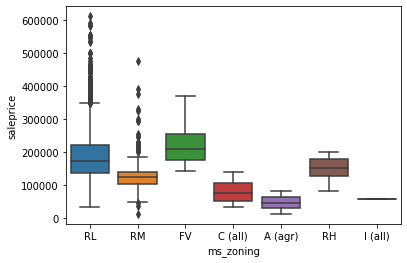

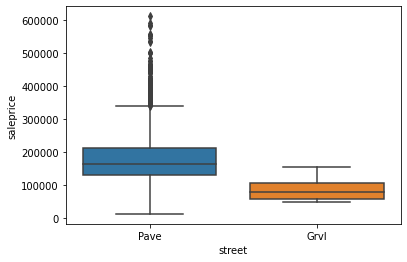

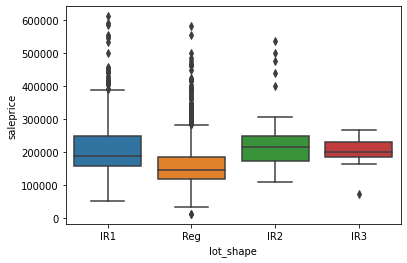

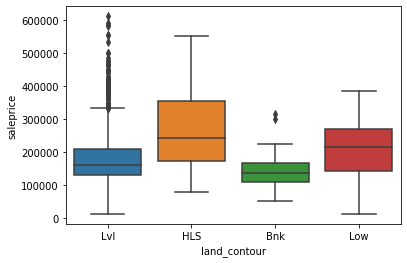

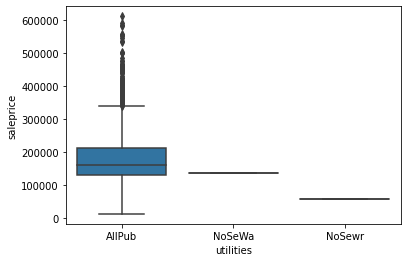

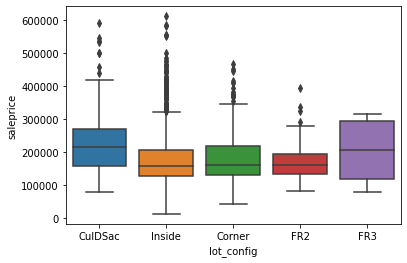

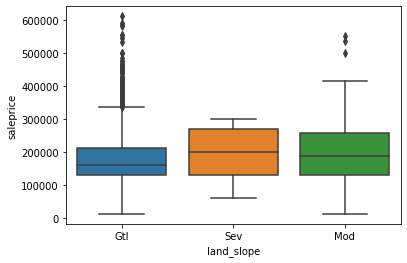

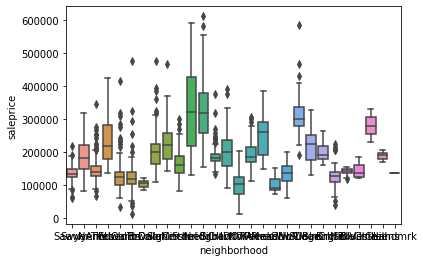

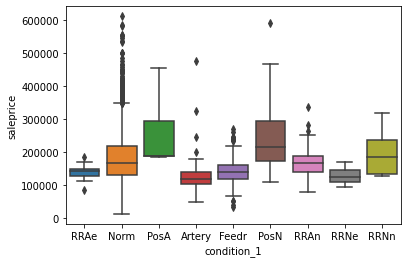

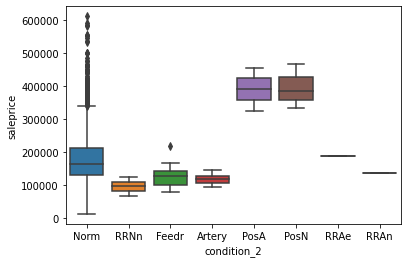

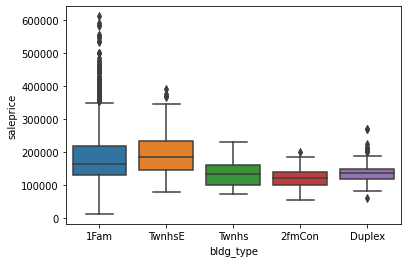

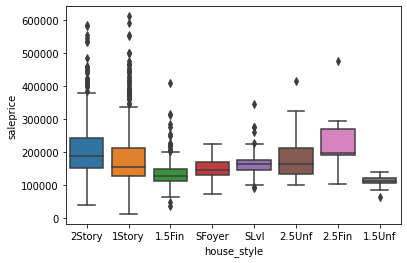

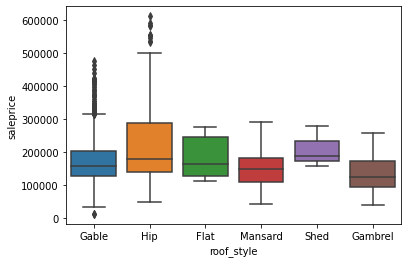

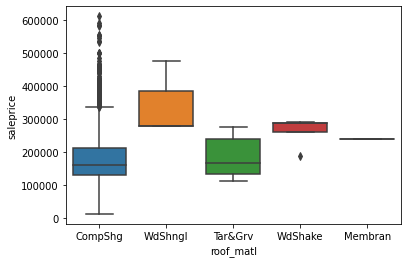

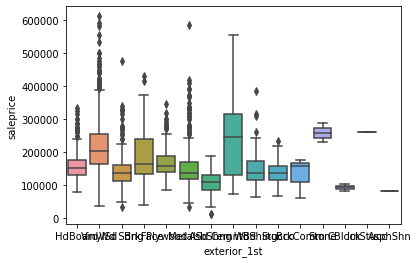

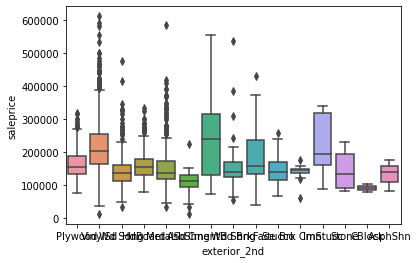

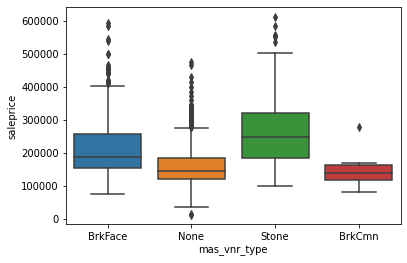

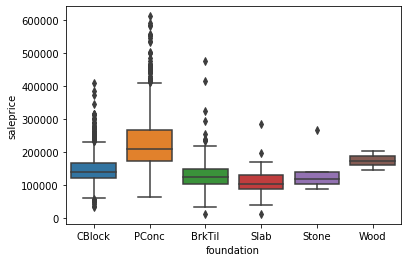

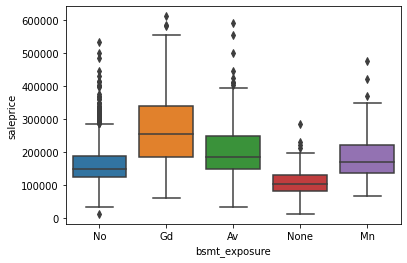

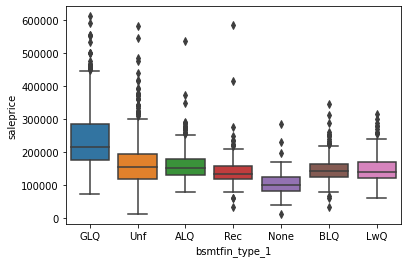

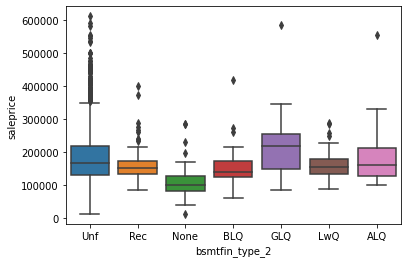

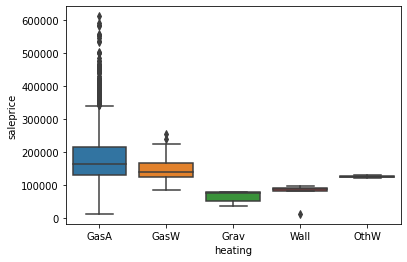

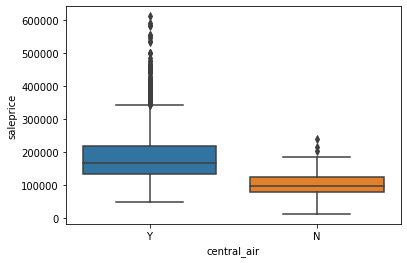

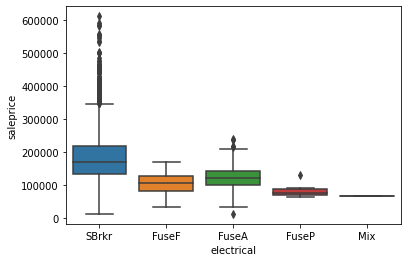

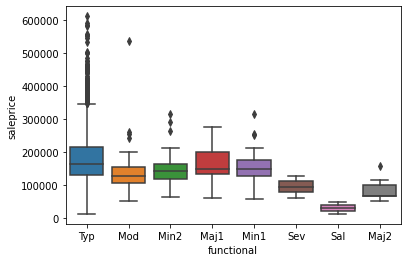

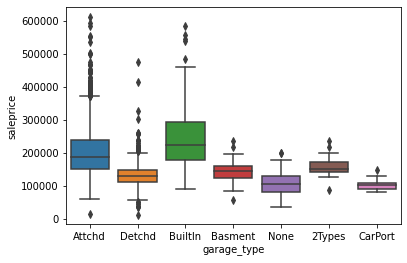

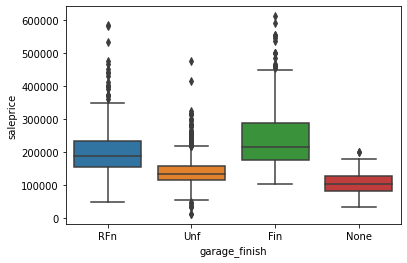

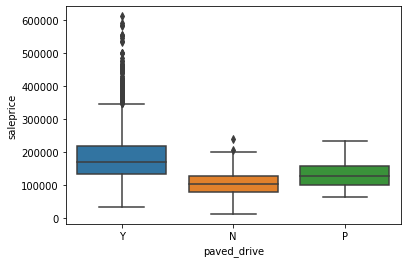

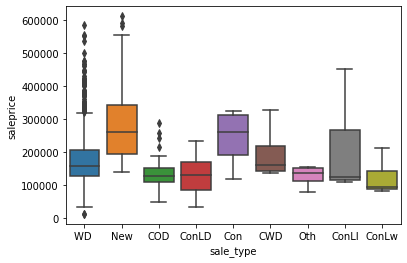

In [42]:
for feature in train_df.select_dtypes(include='object').columns.tolist():
    sns.boxplot(data=train_df, x=feature, y='saleprice')
    plt.show()

Boxplots to see the relation of each catagorical feature with the saleprice. We can see that some features like ms_zoning, neighborhood, condition_1, condition_2, exterior_1st, exterior_2nd, garage_type and sale_type has some relation with saleprice.

###### Matching features between Train and Test dataset

Matching test dataframe colums with train dataframe columns. This will remove the dropped features from test dataset.

In [43]:
test_df.shape

(878, 70)

In [44]:
test_df.isnull().sum().sort_values(ascending = False)

garage_finish      45
garage_type        44
bsmtfin_type_2     25
bsmtfin_type_1     25
bsmt_exposure      25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
id                  0
half_bath           0
bedroom_abvgr       0
bsmt_full_bath      0
full_bath           0
bsmt_half_bath      0
kitchen_qual        0
gr_liv_area         0
low_qual_fin_sf     0
2nd_flr_sf          0
kitchen_abvgr       0
fireplaces          0
functional          0
screen_porch        0
house_age           0
sale_type           0
yr_sold             0
mo_sold             0
misc_val            0
pool_area           0
3ssn_porch          0
heating_qc          0
enclosed_porch      0
open_porch_sf       0
wood_deck_sf        0
paved_drive         0
garage_qual         0
garage_area         0
central_air         0
bsmt_unf_sf         0
heating             0
total_bsmt_sf       0
ms_subclass         0
ms_zoning           0
lot_frontage        0
lot_area            0
street              0
lot_shape 

In [45]:
temp_list = train_df.columns.tolist()

In [46]:
temp_list.remove('saleprice')

In [47]:
test_df = test_df[temp_list]

In [48]:
test_df.shape

(878, 54)

##### Impute NaN values for test dataset numerical features

In [49]:
test_df_num = test_df.select_dtypes(exclude='object').columns.tolist()

In [50]:
test_df[test_df_num].isnull().sum().sort_values(ascending=False)

mas_vnr_area      1
id                0
gr_liv_area       0
house_age         0
open_porch_sf     0
wood_deck_sf      0
garage_qual       0
garage_area       0
fireplaces        0
kitchen_qual      0
half_bath         0
full_bath         0
bsmt_full_bath    0
2nd_flr_sf        0
pid               0
heating_qc        0
total_bsmt_sf     0
bsmtfin_sf_1      0
bsmt_cond         0
bsmt_qual         0
exter_qual        0
overall_qual      0
lot_area          0
lot_frontage      0
reno_age          0
dtype: int64

In [51]:
for feature in test_df_num:
    test_df[feature].fillna(0, inplace = True)

C:\Users\Darre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Replace missing value in mas_vnr_area with 0 as it is only 1 datapoint.

##### Impute NaN values for test dataset numerical categorical features

In [52]:
test_df.isnull().sum().sort_values(ascending = False)

garage_finish     45
garage_type       44
bsmt_exposure     25
bsmtfin_type_2    25
bsmtfin_type_1    25
mas_vnr_type       1
electrical         1
full_bath          0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
2nd_flr_sf         0
gr_liv_area        0
bsmt_full_bath     0
kitchen_qual       0
half_bath          0
functional         0
fireplaces         0
garage_area        0
garage_qual        0
paved_drive        0
wood_deck_sf       0
open_porch_sf      0
sale_type          0
house_age          0
bsmtfin_sf_1       0
id                 0
pid                0
bsmt_cond          0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
roof_style         0
roof_matl          0
exterior_1st 

In [53]:
test_df_cat = test_df.select_dtypes(include='object').columns.tolist()

In [54]:
test_df[test_df_cat].isnull().sum().sort_values(ascending = False)

garage_finish     45
garage_type       44
bsmtfin_type_2    25
bsmtfin_type_1    25
bsmt_exposure     25
electrical         1
mas_vnr_type       1
ms_zoning          0
exterior_2nd       0
paved_drive        0
functional         0
central_air        0
heating            0
foundation         0
exterior_1st       0
street             0
roof_matl          0
roof_style         0
house_style        0
bldg_type          0
condition_2        0
condition_1        0
neighborhood       0
land_slope         0
lot_config         0
utilities          0
land_contour       0
lot_shape          0
sale_type          0
dtype: int64

In [55]:
test_df['electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [56]:
test_df['electrical'].fillna('SBrkr', inplace = True)

Impute test_df electrical with mode 'SBrkr'.

In [57]:
test_df.isnull().sum().sort_values(ascending = False)
test_df_cat = test_df.select_dtypes(include='object').columns.tolist()

In [58]:
for feature in test_df_cat:
    test_df[feature].fillna('None', inplace = True)

In [59]:
test_df.shape

(878, 54)

Replace NaNs with 'None'

### Get Dummies

Dummify categorical features for both train and test datasets.

In [60]:
train_df_cat = train_df.select_dtypes(include='object').columns.tolist()

In [61]:
train_df = pd.get_dummies(data=train_df,columns=train_df_cat)

In [62]:
test_df_cat = test_df.select_dtypes(include='object').columns.tolist()

In [63]:
test_df = pd.get_dummies(data=test_df, columns=test_df_cat)

In [64]:
train_df.shape

(2046, 225)

In [65]:
test_df.shape

(878, 213)

There are different columns in dummified train and test df. Checking which columns each df does not have.

In [66]:
# declare list variable
train_df_missing_col = []
test_df_missing_col = []

# append column missing in train_df

for col in test_df.columns:
    if col not in train_df.columns:
        train_df_missing_col.append(col)
        
# append column missing in test_df

for col in train_df.columns:
    if col != 'saleprice':
        if col not in test_df.columns:
            test_df_missing_col.append(col)



In [67]:
train_df_missing_col # columns in test not in train

['roof_matl_Metal',
 'roof_matl_Roll',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'mas_vnr_type_CBlock',
 'heating_Floor',
 'sale_type_VWD']

In [68]:
test_df_missing_col # columns in train not in test

['ms_zoning_A (agr)',
 'utilities_NoSeWa',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'condition_2_Artery',
 'condition_2_PosN',
 'condition_2_RRAe',
 'condition_2_RRAn',
 'condition_2_RRNn',
 'roof_matl_Membran',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_Stone',
 'heating_OthW',
 'heating_Wall',
 'electrical_Mix',
 'functional_Sal',
 'functional_Sev']

In [69]:
test_df[train_df_missing_col].sum()

roof_matl_Metal         1
roof_matl_Roll          1
exterior_1st_PreCast    1
exterior_2nd_Other      1
exterior_2nd_PreCast    1
mas_vnr_type_CBlock     1
heating_Floor           1
sale_type_VWD           1
dtype: int64

In [70]:
train_df[test_df_missing_col].sum()

ms_zoning_A (agr)       2
utilities_NoSeWa        1
neighborhood_GrnHill    2
neighborhood_Landmrk    1
condition_2_Artery      5
condition_2_PosN        3
condition_2_RRAe        1
condition_2_RRAn        1
condition_2_RRNn        2
roof_matl_Membran       1
exterior_1st_CBlock     2
exterior_1st_ImStucc    1
exterior_1st_Stone      2
exterior_2nd_Stone      6
heating_OthW            2
heating_Wall            6
electrical_Mix          1
functional_Sal          2
functional_Sev          2
dtype: int64

Opting to remove missing columns from each dataset.<br>
If columns were added, only a small percentage of meaningfull data will be added (ie 1/878 to 6/2043 $\approx$ 0.1% to 0.3%) and a large percentage of noise will be included.<br>

Removing colums in train dataset that does not exist in test dataset.

In [71]:
for col in train_df.columns:
    if col != 'saleprice':
        if col not in test_df.columns:
            print(col)
            train_df.drop(columns=col, inplace = True)

ms_zoning_A (agr)
utilities_NoSeWa
neighborhood_GrnHill
neighborhood_Landmrk
condition_2_Artery
condition_2_PosN
condition_2_RRAe
condition_2_RRAn
condition_2_RRNn
roof_matl_Membran
exterior_1st_CBlock
exterior_1st_ImStucc
exterior_1st_Stone
exterior_2nd_Stone
heating_OthW
heating_Wall
electrical_Mix
functional_Sal
functional_Sev


Removing colums in test dataset that does not exist in train dataset.

In [72]:
for col in test_df.columns:
    if col != 'saleprice':
        if col not in train_df.columns:
            print(col)
            test_df.drop(columns=col, inplace = True)

roof_matl_Metal
roof_matl_Roll
exterior_1st_PreCast
exterior_2nd_Other
exterior_2nd_PreCast
mas_vnr_type_CBlock
heating_Floor
sale_type_VWD


Only the saleprice column will be log transformed, as transforming the other features did not positively impact the model much

# Train and score model

In [73]:
X = train_df.drop(columns = 'saleprice')
y = train_df['saleprice']

In [74]:
print(X.shape)
y.shape

(2046, 205)


(2046,)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 147)

In [76]:
ss = StandardScaler()

In [77]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Baseline Model 

In [78]:
# baseline model

y_baseline_pred = [np.mean(train_df['saleprice']) for i in range(len(y_test))]
print(y_baseline_pred[:5])
print(len(y_baseline_pred))

[181418.1368523949, 181418.1368523949, 181418.1368523949, 181418.1368523949, 181418.1368523949]
676


In [79]:
# baseline rmse

baseline_rmse = mean_squared_error(y_test, y_baseline_pred, squared = False)
baseline_rmse

74361.95356422584

### Linear Regression

Linear Regression model will make a the best fit line to predict the sale price. It takes into account all features, wh

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(X_train_sc, np.log(y_train))

LinearRegression()

In [82]:
lr_train_r2 = lr.score(X_train_sc, np.log(y_train))
lr_test_r2 = lr.score(X_test_sc, np.log(y_test))
lr_train_cv_r2 = cross_val_score(lr, X_train_sc, np.log(y_train), cv = 5).mean()
lr_test_cv_r2 = cross_val_score(lr, X_test_sc,  np.log(y_test), cv = 5).mean()

In [83]:
# by left way

lr_y_pred = lr.predict(X_test_sc)
lr_rmse = mean_squared_error(y_test, lr_y_pred, squared = False)
lr_rmse_train = mean_squared_error(y_train, lr.predict(X_train_sc),squared = False)

In [84]:
# # by right way

# lr_y_pred = np.exp(lr.predict(X_test_sc))
# lr_rmse = mean_squared_error(y_test, lr_y_pred, squared = False)
# lr_rmse_train = mean_squared_error(y_train, np.exp(lr.predict(X_train_sc)),squared = False)

### Linear Regression with Ridge

In [85]:
r_alphas = np.logspace (-1, 10, 300)

In [86]:
ridgecv = RidgeCV(r_alphas)

In [87]:
ridgecv.fit(X_train_sc, np.log(y_train))
ridgecv_r2_train = (ridgecv.score(X_train_sc, np.log(y_train)))
ridgecv_r2_test = (ridgecv.score(X_test_sc, np.log(y_test)))

In [88]:
r_y_pred = np.exp(ridgecv.predict(X_test_sc))

In [89]:
r_rmse = mean_squared_error(y_test,r_y_pred,squared=False)

In [90]:
r_rmse_train = mean_squared_error(y_train, np.exp(ridgecv.predict(X_train_sc)),squared = False)

### Linear Regression with Lasso

In [91]:
lassocv = LassoCV(n_alphas = 500)

In [92]:
lassocv.fit(X_train_sc, np.log(y_train))
lasso_train_r2 = lassocv.score(X_train_sc, np.log(y_train))
lasso_test_r2 = lassocv.score(X_test_sc, np.log(y_test))

In [93]:
l_y_pred = np.exp(lassocv.predict(X_test_sc))

In [94]:
l_rmse = mean_squared_error(y_test,l_y_pred,squared=False)

In [95]:
l_rmse_train = mean_squared_error(y_train, np.exp(lassocv.predict(X_train_sc)), squared = False)

In [96]:
def lasso_model():
    t = PrettyTable(['Model', 'R2 Scores', 'RMSE'])

    print(t)

In [97]:
from prettytable import PrettyTable
def model_scores():
    t = PrettyTable(['Model', 'R2 Scores', 'RMSE'])
    t.add_row(['Baseline', 'na', 'na'])
    t.add_row(['Baseline', 'na', baseline_rmse])
    t.add_row(['-------', '-------', '-------'])
    t.add_row(['Linear Regression Train', lr_train_r2, lr_rmse_train])
    t.add_row(['Linear Regression Train', lr_test_r2, lr_rmse])
    t.add_row(['-------', '-------', '-------'])
    t.add_row(['Ridge CV Train', ridgecv_r2_train, r_rmse_train])
    t.add_row(['Ridge CV Test', ridgecv_r2_test, r_rmse])
    t.add_row(['-------', '-------', '-------'])
    t.add_row(['Lasso Train CV', lasso_train_r2, l_rmse_train])
    t.add_row(['Lasso Test CV', lasso_test_r2, l_rmse])
    t.add_row(['-------', '-------', '-------'])
    print(t)

In [98]:
model_scores()

+-------------------------+------------------------+--------------------+
|          Model          |       R2 Scores        |        RMSE        |
+-------------------------+------------------------+--------------------+
|         Baseline        |           na           |         na         |
|         Baseline        |           na           | 74361.95356422584  |
|         -------         |        -------         |      -------       |
| Linear Regression Train |   0.9462586774729779   | 200345.04735245905 |
| Linear Regression Train | -5.268541557290865e+24 |  917588119066.73   |
|         -------         |        -------         |      -------       |
|      Ridge CV Train     |   0.9461475225827451   | 17821.039587898882 |
|      Ridge CV Test      |   0.8800344517985303   | 20272.307514665357 |
|         -------         |        -------         |      -------       |
|      Lasso Train CV     |   0.9409818506106752   | 18368.113462614077 |
|      Lasso Test CV      |   0.886075

Looking at the R2 scores for all 3 models, Linear Regression did the worse with a very large difference between the train and test score. The model looked overfit. It could be due to the large number of features that were made in the process. We will use this as our baseline model. Comparing lasso and ridge R2 scores, both models have very high R2 scores, meaning that a high percentage of the variance of our target value can be explained by our features with our models.

### Coefficients

In [99]:
lasso_coefs = pd.DataFrame(list(zip(np.exp(lassocv.coef_),X.columns)))
lasso_coefs.rename(columns = { 0:
                       'coef',
                       1:
                       'variable'}, inplace = True)
lasso_coefs.sort_values(by='coef', ascending = False, inplace = True)
lasso_coefs['coef'] = lasso_coefs['coef'] - 1

In [100]:
ridge_coefs = pd.DataFrame(list(zip(np.exp(ridgecv.coef_),X.columns)))
ridge_coefs.rename(columns = { 0:
                       'coef',
                       1:
                       'variable'}, inplace = True)
ridge_coefs.sort_values(by='coef', ascending = False, inplace = True)
ridge_coefs['coef'] = ridge_coefs['coef'] - 1

In [101]:
linear_coefs = pd.DataFrame(list(zip(np.exp(lr.coef_),X.columns)))
linear_coefs.rename(columns = { 0:
                       'coef',
                       1:
                       'variable'}, inplace = True)
linear_coefs.sort_values(by='coef', ascending = False, inplace = True)
linear_coefs['coef'] = linear_coefs['coef'] - 1

C:\Users\Darre\AppData\Local\Temp/ipykernel_21672/2007225375.py:1: RuntimeWarning: overflow encountered in exp
  linear_coefs = pd.DataFrame(list(zip(np.exp(lr.coef_),X.columns)))


In [102]:
# recap corr from above

corr['saleprice'].sort_values(ascending = False).head(10)

saleprice        1.000000
overall_qual     0.800207
exter_qual       0.712146
gr_liv_area      0.697038
kitchen_qual     0.692336
garage_area      0.650270
garage_cars      0.648220
total_bsmt_sf    0.628925
1st_flr_sf       0.618486
bsmt_qual        0.612188
Name: saleprice, dtype: float64

In [103]:
corr['saleprice'].sort_values(ascending = False).tail(10)

bsmt_half_bath   -0.045328
id               -0.051398
ms_subclass      -0.087335
overall_cond     -0.097019
kitchen_abvgr    -0.125444
enclosed_porch   -0.135656
pid              -0.255052
garage_age       -0.533962
reno_age         -0.551716
house_age        -0.571881
Name: saleprice, dtype: float64

In [104]:
linear_coefs.head()

,coef,variable
204,inf,sale_type_WD
197,inf,sale_type_CWD
193,inf,paved_drive_N
194,inf,paved_drive_P
195,inf,paved_drive_Y


In [106]:
linear_coefs.tail()

,coef,variable
77,-1.0,condition_1_Artery
78,-1.0,condition_1_Feedr
79,-1.0,condition_1_Norm
80,-1.0,condition_1_PosA
102,-1.0,roof_style_Flat


In [107]:
lasso_coefs.head(10)

,coef,variable
13,0.136242,gr_liv_area
181,0.127835,functional_Typ
4,0.082780,overall_qual
178,0.064583,functional_Min1
179,0.063430,functional_Min2
180,0.038235,functional_Mod
9,0.030490,bsmtfin_sf_1
176,0.028445,functional_Maj1
10,0.026529,total_bsmt_sf
19,0.025213,garage_area


In [117]:
# features that do not impact saleprices, reduced to 0

lasso_coefs[lasso_coefs['coef'] == 0]

,coef,variable
152,0.0,bsmt_exposure_None
157,0.0,bsmtfin_type_1_None
42,0.0,utilities_NoSewr
154,0.0,bsmtfin_type_1_BLQ
43,0.0,lot_config_Corner
47,0.0,lot_config_Inside
150,0.0,bsmt_exposure_Mn
163,0.0,bsmtfin_type_2_LwQ
49,0.0,land_slope_Mod
143,0.0,foundation_CBlock


In [108]:
lasso_coefs.tail(10)

,coef,variable
77,-0.008869,condition_1_Artery
170,-0.010466,central_air_N
56,-0.010624,neighborhood_CollgCr
112,-0.012562,exterior_1st_AsbShng
58,-0.013330,neighborhood_Edwards
193,-0.013547,paved_drive_N
62,-0.014799,neighborhood_MeadowV
23,-0.015727,house_age
25,-0.018175,ms_zoning_C (all)
24,-0.029773,reno_age


In [109]:
ridge_coefs.head(10)

,coef,variable
29,0.292054,ms_zoning_RL
30,0.233375,ms_zoning_RM
181,0.163846,functional_Typ
26,0.135590,ms_zoning_FV
13,0.133660,gr_liv_area
178,0.084945,functional_Min1
179,0.083960,functional_Min2
4,0.075967,overall_qual
180,0.053214,functional_Mod
176,0.042671,functional_Maj1


In [110]:
ridge_coefs.tail(10)

,coef,variable
66,-0.055315,neighborhood_NWAmes
61,-0.056277,neighborhood_IDOTRR
63,-0.059514,neighborhood_Mitchel
72,-0.064133,neighborhood_SawyerW
59,-0.065966,neighborhood_Gilbert
71,-0.067529,neighborhood_Sawyer
69,-0.081127,neighborhood_OldTown
64,-0.087349,neighborhood_NAmes
58,-0.090218,neighborhood_Edwards
56,-0.096080,neighborhood_CollgCr


Coefficients mean that for every unit increase for the feature, our target will also increase. <br>
<br>
For Linear Regression with Ridge and Lasso, the top 5 positive coefficients are similar, mainly consisting of
- gr_living_area ( above grade living area square feet )
- overall_qual ( overall material and finish quality )
- functional_typ ( home functionality rating: house with typical functionality )
- functional_min1 ( home functionality rating: house with minor deductions 1)
- functional_min2 ( home functionality rating : house with deductions 2)

The top 5 negative coefficients are simiar,
- reno_age ( number of years since last renovation )
- house_age ( age of the house )
- neighborhood_MeadowV ( Physical locations within Ames city limits: Meadow Village )
- ms_zoning_c (  Identifies the general zoning classification of the sale: Commercial )
- paved_drive_N ( Paved driveway: Dirt or gravel )


### Distribution of Residuals 

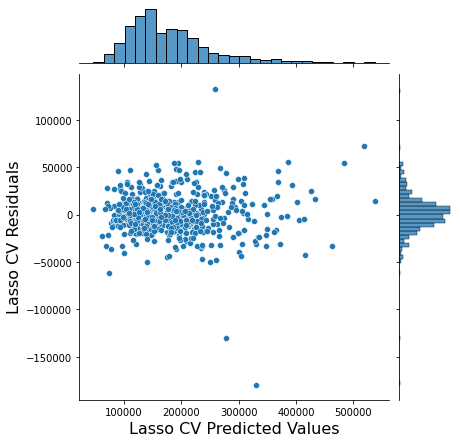

In [111]:
l_residuals = y_test - l_y_pred
lasso_joint = sns.jointplot(y=l_residuals,x=l_y_pred)
lasso_joint.set_axis_labels('Lasso CV Predicted Values', 'Lasso CV Residuals', fontsize=16);

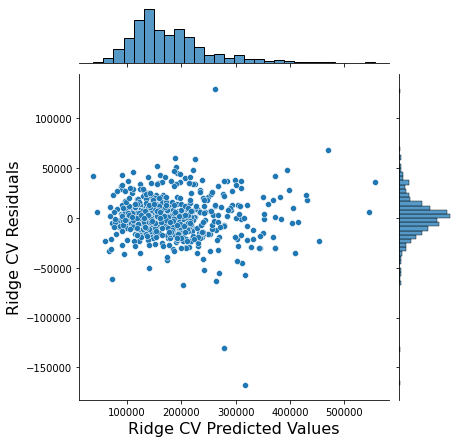

In [112]:
r_residuals = y_test - r_y_pred
ridge_joint = sns.jointplot(y=r_residuals,x=r_y_pred)
ridge_joint.set_axis_labels('Ridge CV Predicted Values', 'Ridge CV Residuals', fontsize=16);

The distribution of residuals for both lasso and ridge seem to be normally distributed, satisfying the condition of normally distributed for linear regression.

### Kaggle Submission Score

###### Linear Regression

In [113]:
X_sc = ss.fit_transform(X)
test_sc = ss.transform(test_df)

linear = LinearRegression()

linear.fit(X_sc, np.log(y))

chosen_y_pred = np.exp(linear.predict(test_sc))

submission_ridge = pd.DataFrame()
submission_ridge['Id'] = test_df['id']
submission_ridge['SalePrice'] = chosen_y_pred
submission_ridge.to_csv('./datasets/linear regression submission.csv', index = False)

C:\Users\Darre\AppData\Local\Temp/ipykernel_21672/2557273678.py:8: RuntimeWarning: overflow encountered in exp
  chosen_y_pred = np.exp(linear.predict(test_sc))


##### Linear Regression with Lasso Submission to Kaggle

In [114]:
lasso_chosen = lassocv.alpha_

X_sc = ss.fit_transform(X)
test_sc = ss.transform(test_df)

lasso = Lasso(alpha = lasso_chosen)

lasso.fit(X_sc, np.log(y))

print('R2 score:')
print(lasso.score(X_sc, np.log(y)))

chosen_l_y_pred = np.exp(lasso.predict(test_sc))

submission_ridge = pd.DataFrame()
submission_ridge['Id'] = test_df['id']
submission_ridge['SalePrice'] = chosen_l_y_pred
submission_ridge.to_csv('./datasets/lasso submission.csv', index = False)

R2 score:
0.9270123090238341


##### Linear Regression with Ridge Submission to Kaggle

In [115]:
ridge_chosen = ridgecv.alpha_

X_sc = ss.fit_transform(X)
test_sc = ss.transform(test_df)

ridge = Ridge(alpha = ridge_chosen)

ridge.fit(X_sc, np.log(y))

print('R2 score:')
print(ridge.score(X_sc, np.log(y)))

chosen_r_y_pred = np.exp(ridge.predict(test_sc))

submission_ridge = pd.DataFrame()
submission_ridge['Id'] = test_df['id']
submission_ridge['SalePrice'] = chosen_r_y_pred
submission_ridge.to_csv('./datasets/ridge submission.csv', index = False)

R2 score:
0.9312132762065903


### Lasso Kaggle score: <br>
Private: 19,874<br>
Public: 21,076<br>
It has a spread of 1202.<br><br>
Ridge Kaggle score:<br>
Private Score: 20,137<br>
Public Score: 21,464<br>
It has a spread of 1326.

# Conclusion

###### Model Choice : Linear Regression with Lasso

Looking at the overall scoring for Linear Regression, it is not a good model for our situation as it is overfit.<br>
<br>
Using the train test scores for linear regression, we can see that for lasso and ridge, the training scores were a little lower. This is to be expected as we introduced some bias to get better accuracy, which can be seen in the test set R2 scores for lasso and ridge.<br>
<br>
Between Lasso and Ridge, both models gave good metrics, with a similar RMSE and coefficients. However, the best model for this case would be Linear Regression with Lasso, as it predicts the saleprice with the highest accuracy among the 3 models, and the lowst RMSE spread. It also reduces the coefficients of features that are not relevant or not a good predictor of saleprice to zero.<br><br>

###### Findings

Recalling our problem statement: 'There are many variables that determine how much a home can fetch, and there is traditionally a lot of information asymmetry between buyers, sellers and realtors.<br>
<br>
Our model is able to predict sale price of a house, given it's features with an accuracy of +- $20,000 ( based on kaggle private score ). <br><br>
Features that affect the sale price positively are:<br>
- gr_living_area ( above grade living area square feet )
 - The larger the above ground living area, the higher the saleprice
- overall_qual ( overall material and finish quality )
 - The better the material and finish of a house, the higher the saleprice
- functional_typ ( home functionality rating: house with typical functionality )
 - Functions of rooms are working as expected (eg, toilet with working sink and show, rooms with windows that are in working condition etc)
- functional_min1 ( home functionality rating: house with minor deductions 1)
 - Functions of rooms are working as expected, except for some very minor issues
- functional_min2 ( home functionality rating : house with deductions 2)
 - Functions of rooms are working as expected, except for some issues<br><br>

Features that affect the sale price negatively are:<br>
- reno_age ( number of years since last renovation )
 - Houses with a low reno age usually hints that it is in newer and better condition
- house_age ( age of the house )
 - The older the house, the lower the saleprice
- neighborhood_MeadowV ( Physical locations within Ames city limits: Meadow Village )
 - The closer the house is to Meadow Village, the lower the saleprice
- ms_zoning_c (  Identifies the general zoning classification of the sale: Commercial )
 - Sale of house for commercial purposes will bring a lower saleprice
- paved_drive_N ( Paved driveway: Dirt or gravel )
 - Houses without paved driveway will fetch a lower saleprice compared to a house with a paved driveway.


With this in mind, home buyers / sellers and real estate agents are able to get an outside view of the market rate of a house. They can have a rough feel of the price of the house by observing the features that positively and negatively affect the price.<br>
They can also use the model to get a clearer picture of theh saleprice. In this way, they will not overpay / under price / estimate inaccurately the value of a house<br>
Buyers and real estate agents are able to pick out under priced house, and sellers know when they are offered a good price.
<br><br>


##### Limitations of Model

Every model has its limitations:
- Geographical constraints: The dataset is restricted to Ames, a city in Iowa with a relatively small population
- The dataset contains data from 2006 to 2010. Trends and demands may have changed since then.
- The model is able to predict well for homes within the range of 100k to 300k, as that is where the majority of the data is.
- Other features suchs as amenities / educational institutions could better train the model.
- Level of crime rates for different neighborhoods may also affect saleprice.<br><br>


##### Future Improvements

In future, this model can be further improved by introducing some potentially impactful features mentioned above, and adding data from neighboring cities. Doing so will expand the coverage of the model and allows the identification of trends between cities.